<a href="https://colab.research.google.com/github/mal258/machinelearning258/blob/master/Kmeans_Clustering_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import os
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster
import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet,linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc
import seaborn as sns
import hdbscan
from sklearn.mixture import GaussianMixture

In [0]:
url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/heart.csv"
file=requests.get(url).content
heart_data=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

In [0]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.891089
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.203480
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000


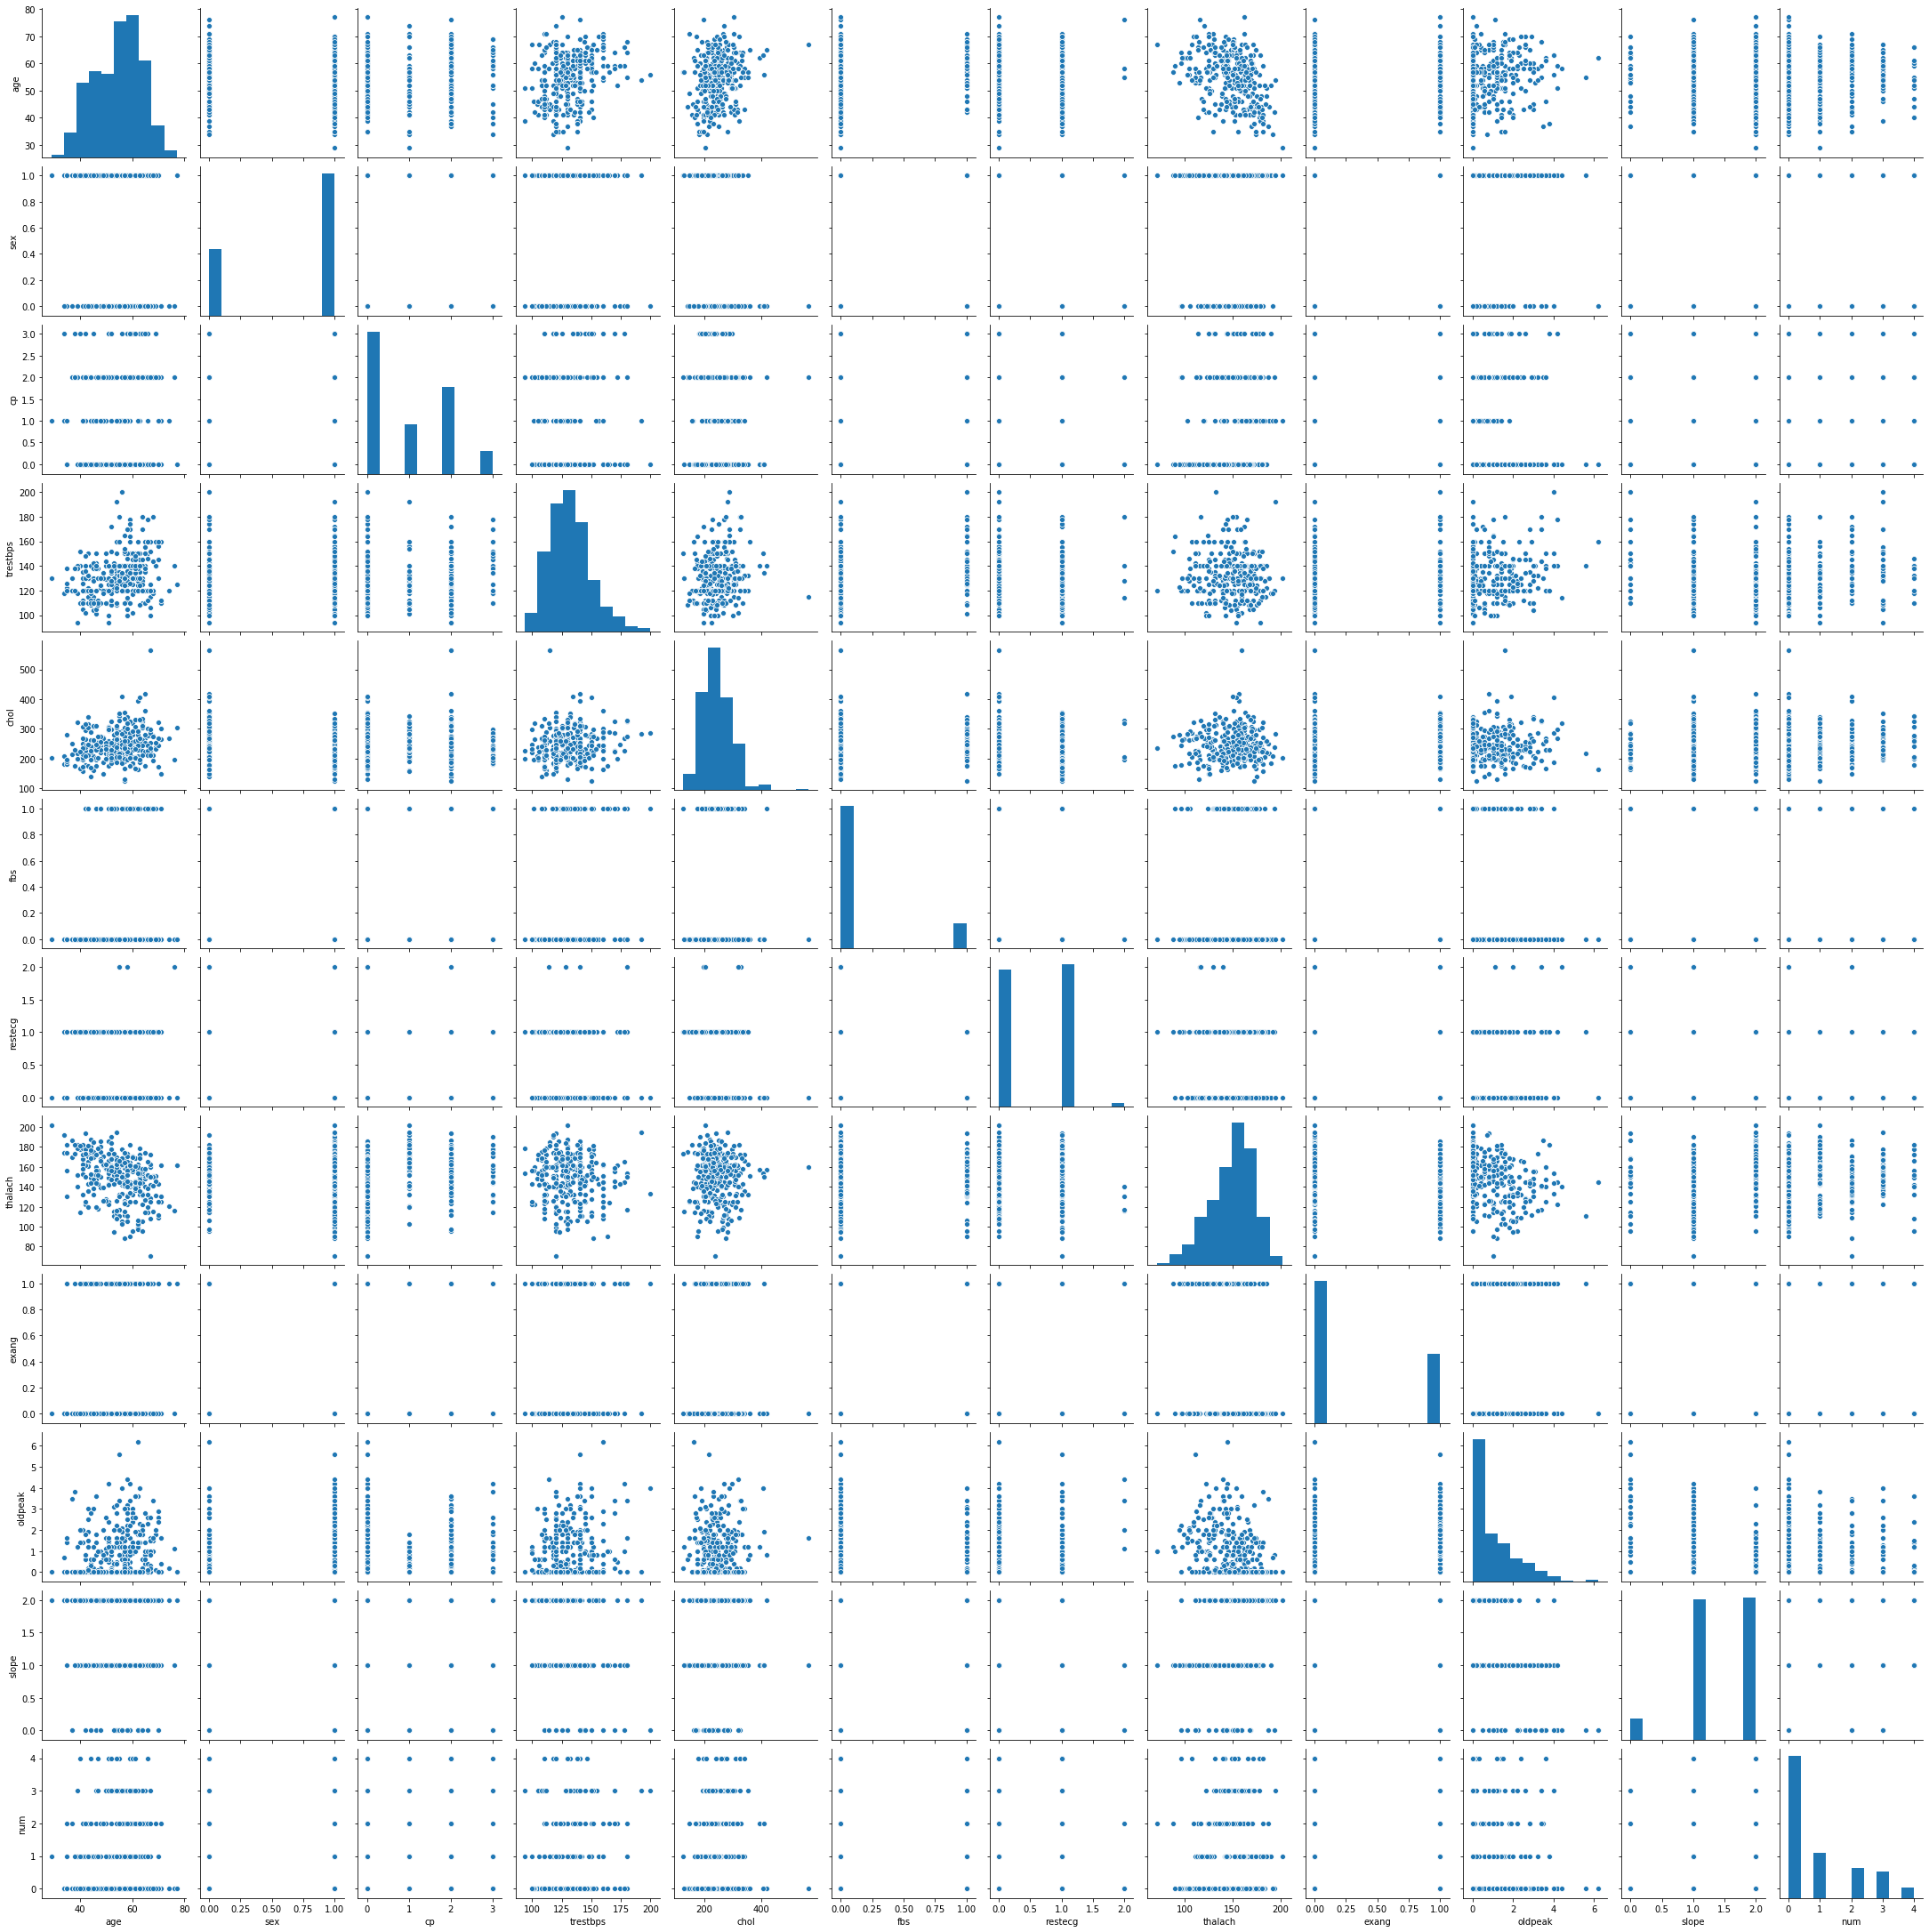

In [0]:
sns.pairplot(heart_data)

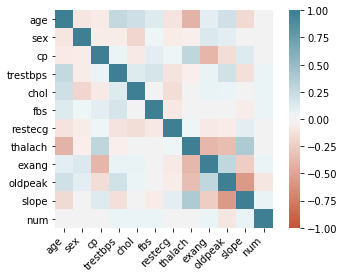

In [0]:
correlation = heart_data.corr()
ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [134]:
heart_data['chol'].value_counts()

High (150+)         298
Medium (100-150)      5
Low (0-100)           0
Name: chol, dtype: int64

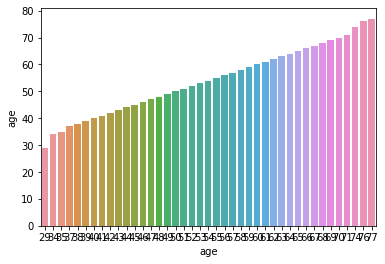

In [138]:
sns.barplot(x=heart_data.groupby('age')['sex'].count().reset_index()['age'],y=heart_data.groupby('age')['sex'].count().reset_index()['age'])

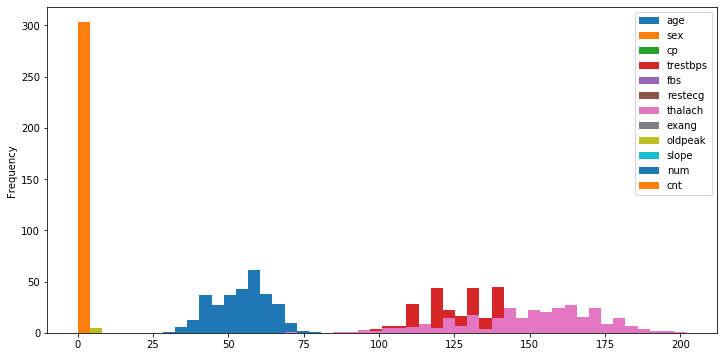

In [140]:
heart_data.plot(kind='hist',bins=50,figsize=(12,6))

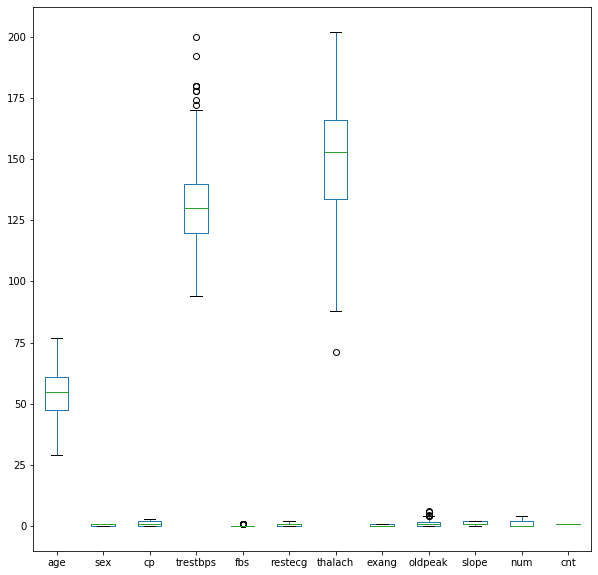

In [144]:
heart_data.plot.box(figsize=(10,10))

In [146]:
heart_data.iloc[:,[0,1,2,3,4,5,6,7]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach
0,63,1,3,145,High (150+),1,0,150
1,37,1,2,130,High (150+),0,1,187
2,41,0,1,130,High (150+),0,0,172
3,56,1,1,120,High (150+),0,1,178
4,57,0,0,120,High (150+),0,1,163
...,...,...,...,...,...,...,...,...
298,57,0,0,140,High (150+),0,1,123
299,45,1,3,110,High (150+),0,1,132
300,68,1,0,144,High (150+),1,1,141
301,57,1,0,130,Medium (100-150),0,1,115


In [0]:
X_heart = heart_data.iloc[:,[0,1,2,3,4,5,6,7]]

In [0]:
# Scaling Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_heart)

## Gausian Mixture Model

In [0]:
gmm = GaussianMixture(n_components=4).fit(X_scaled)
labels = gmm.predict(X_scaled)

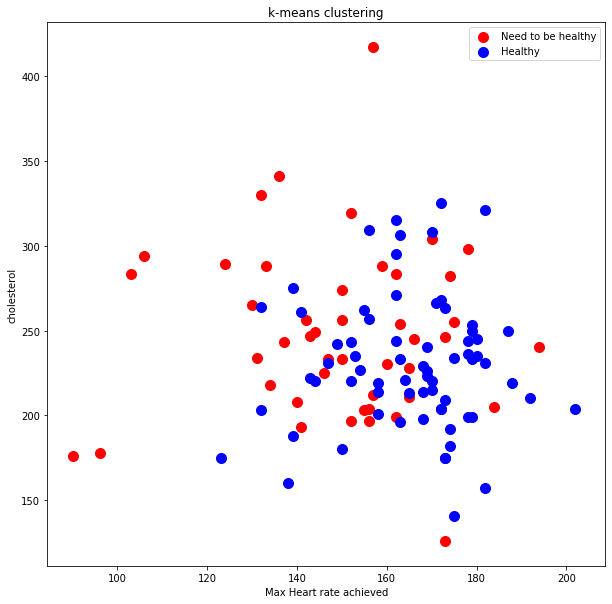

In [227]:
plt.figure(figsize=(10,10))
plt.scatter(X_heart.iloc[labels == 0,7], X_heart.iloc[labels == 0,4], s= 100, color = 'red', label ='Need to be healthy')
plt.scatter(X_heart.iloc[labels ==  1,7], X_heart.iloc[labels == 1,4], s= 100, color = 'blue', label ='Healthy')
plt.title('k-means clustering')
plt.xlabel('Max Heart rate achieved')
plt.ylabel('cholesterol')
plt.legend()
plt.show()

## Agglomerative Clustering

In [0]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_agg=cluster.fit_predict(X_scaled)

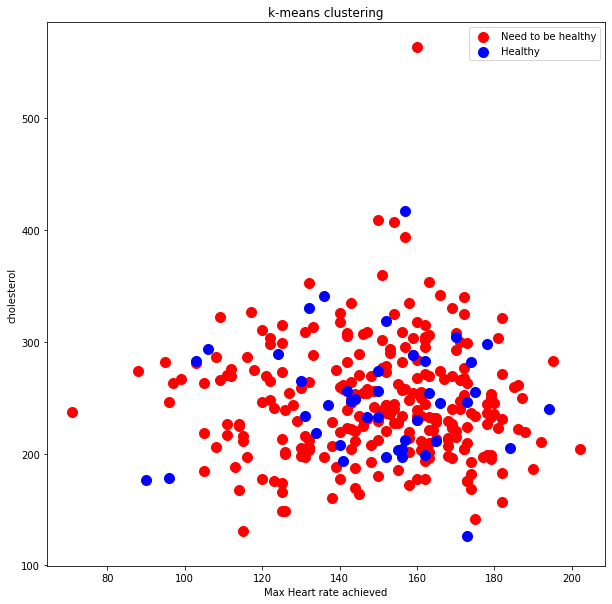

In [229]:
plt.figure(figsize=(10,10))
plt.scatter(X_heart.iloc[y_agg == 0,7], X_heart.iloc[y_agg == 0,4], s= 100, color = 'red', label ='Need to be healthy')
plt.scatter(X_heart.iloc[y_agg ==  1,7], X_heart.iloc[y_agg == 1,4], s= 100, color = 'blue', label ='Healthy')
plt.title('k-means clustering')
plt.xlabel('Max Heart rate achieved')
plt.ylabel('cholesterol')
plt.legend()
plt.show()

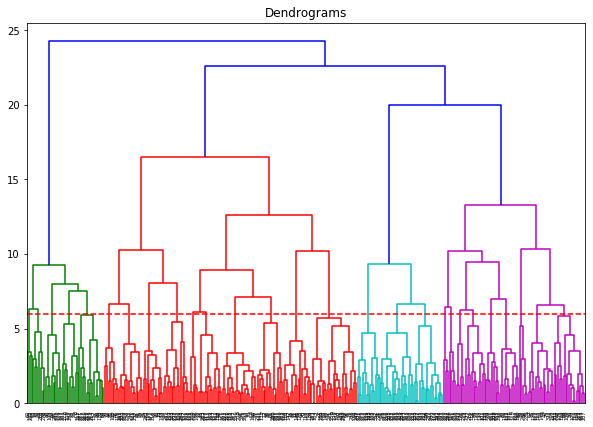

In [231]:
# Hiearachial Clustering Dendrogram
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [0]:
X_db_scaled=pd.DataFrame(X_scaled)

In [0]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.3,min_samples=2)
db_clusters = dbscan.fit_predict(X_scaled)

In [0]:
X_db_scaled['clusters']=db_clusters

Text(0, 0.5, 'Feature 1')

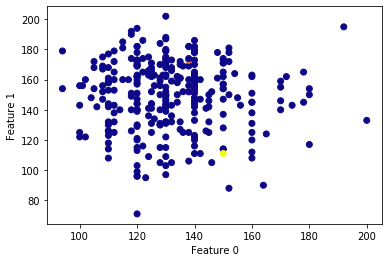

In [198]:
# plot the cluster assignments
plt.scatter(X_heart['trestbps'], X_heart['thalach'], c=db_clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

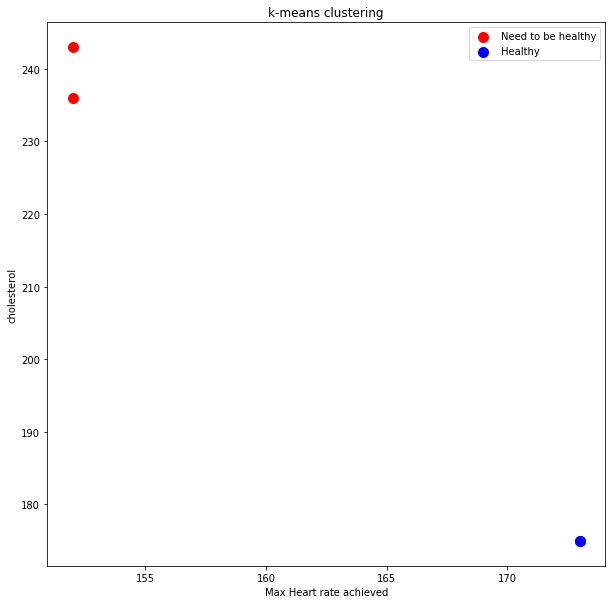

In [200]:

plt.figure(figsize=(10,10))
plt.scatter(X_heart.iloc[db_clusters == 0,7], X_heart.iloc[db_clusters == 0,4], s= 100, color = 'red', label ='Need to be healthy')
plt.scatter(X_heart.iloc[db_clusters ==  1,7], X_heart.iloc[db_clusters == 1,4], s= 100, color = 'blue', label ='Healthy')
plt.title('k-means clustering')
plt.xlabel('Max Heart rate achieved')
plt.ylabel('cholesterol')
plt.legend()
plt.show()

In [0]:
hdbscan = hdbscan.HDBSCAN()

In [0]:
hdb=hdbscan.fit(X_scaled)

In [218]:
hdbscan.labels_.max()

4

Text(0, 0.5, 'Feature 1')

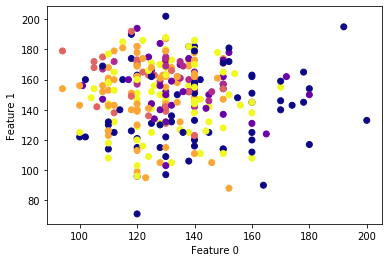

In [219]:
plt.scatter(X_heart['trestbps'], X_heart['thalach'], c=hdbscan.labels_, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")